### Вариант 2)
#### Прочитайте базу COVID19_data.csv .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import scipy.stats as scs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression
import statsmodels.api as sm

In [2]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
19923,19924,04/29/2020,Wyoming,US,2020-04-30 02:32:27,545.0,7.0,0.0
19924,19925,04/29/2020,Xinjiang,Mainland China,2020-04-30 02:32:27,76.0,3.0,73.0
19925,19926,04/29/2020,Yukon,Canada,2020-04-30 02:32:27,11.0,0.0,0.0
19926,19927,04/29/2020,Yunnan,Mainland China,2020-04-30 02:32:27,185.0,2.0,181.0
19927,19928,04/29/2020,Zhejiang,Mainland China,2020-04-30 02:32:27,1268.0,1.0,1263.0


In [4]:
COVID_.describe()

,SNo,Confirmed,Deaths,Recovered
count,19928.000000,19928.000000,19928.000000,19928.000000
mean,9964.500000,3550.325472,219.624147,927.807607
std,5752.862418,17033.481526,1572.904962,6605.789443
min,1.000000,0.000000,0.000000,0.000000
25%,4982.750000,11.000000,0.000000,0.000000
50%,9964.500000,118.000000,1.000000,2.000000
75%,14946.250000,787.000000,10.000000,86.250000
max,19928.000000,299691.000000,27682.000000,132929.000000


In [5]:
COVID_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19928 entries, 0 to 19927
Data columns (total 8 columns):
SNo                19928 non-null int64
ObservationDate    19928 non-null object
Province/State     9746 non-null object
Country/Region     19928 non-null object
Last Update        19928 non-null object
Confirmed          19928 non-null float64
Deaths             19928 non-null float64
Recovered          19928 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


In [6]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']) #.dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']) #.dt.date

In [7]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [8]:
COVID.tail(20)

Confirmed   Deaths  Recovered
Data       Country/Region                                     
2020-04-29 Thailand                 2947.0     54.0     2665.0
           Timor-Leste                24.0      0.0        6.0
           Togo                      109.0      7.0       64.0
           Trinidad and Tobago       116.0      8.0       71.0
           Tunisia                   980.0     40.0      294.0
           Turkey                 117589.0   3081.0    44040.0
           UK                     166441.0  26166.0      857.0
           US                    1039909.0  60967.0   120720.0
           Uganda                     81.0      0.0       52.0
           Ukraine                  9866.0    250.0     1103.0
           United Arab Emirates    11929.0     98.0     2329.0
           Uruguay                   630.0     15.0      412.0
           Uzbekistan               2002.0      9.0     1096.0
           Venezuela                 331.0     10.0      142.0
           Vietnam                   270.0      0.0      222.0
           West Bank and Gaza        344.0      2.0       71.0
           Western Sahara              6.0      0.0        5.0
           Yemen                       6.0      0.0        1.0
           Zambia                     97.0      3.0       54.0
           Zimbabwe                   32.0      4.0        5.0

In [9]:
COVID_['Country/Region'].unique().shape

(220,)

In [10]:
for i in COVID_['Country/Region'].unique():
    _ = COVID.loc[COVID.index.get_level_values('Country/Region')==i].shape
    if (_[0] > 50) & (COVID.loc[(COVID.index.get_level_values( 'Country/Region')==i),'Confirmed'].max() > 50000):
        print(i, _)

Mainland China (99, 3)
US (99, 3)
Brazil (65, 3)
France (97, 3)
Canada (95, 3)
Germany (93, 3)
Italy (90, 3)
UK (90, 3)
Russia (90, 3)
Spain (89, 3)
Iran (71, 3)


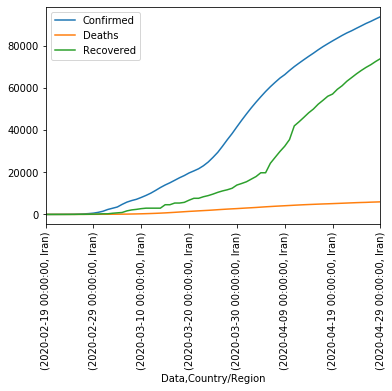

In [11]:
# судя по всему, US и Brazil и Canada и UK и Russia =( далеко от плато.
# Iran, Germany,Italy,Spain  начали выходить на плато. France - не понятно.  возьмем для оптимизма Iran
COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

странные скачки в Recovered, посмотрим на них поближе

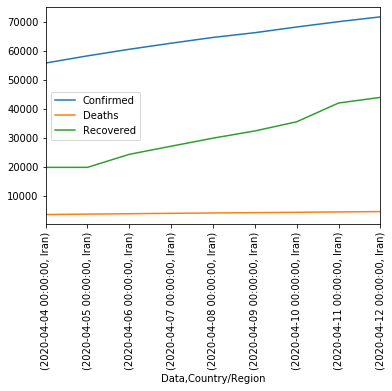

In [12]:
COVID.loc[((COVID.index.get_level_values( 'Country/Region')=='Iran') & (COVID.index.get_level_values('Data') > pd.to_datetime('2020-04-03'))& (COVID.index.get_level_values('Data') < pd.to_datetime('2020-04-13'))), ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

In [13]:
COVID.loc[((COVID.index.get_level_values('Country/Region')=='Iran') & (COVID.index.get_level_values('Data') > pd.to_datetime('2020-04-03'))& (COVID.index.get_level_values('Data') < pd.to_datetime('2020-04-13'))), ['Confirmed','Deaths','Recovered']]

,,Confirmed,Deaths,Recovered
Data,Country/Region,,,
2020-04-04,Iran,55743.0,3452.0,19736.0
2020-04-05,Iran,58226.0,3603.0,19736.0
2020-04-06,Iran,60500.0,3739.0,24236.0
2020-04-07,Iran,62589.0,3872.0,27039.0
2020-04-08,Iran,64586.0,3993.0,29812.0
2020-04-09,Iran,66220.0,4110.0,32309.0
2020-04-10,Iran,68192.0,4232.0,35465.0
2020-04-11,Iran,70029.0,4357.0,41947.0
2020-04-12,Iran,71686.0,4474.0,43894.0


скачки в количестве выздоровших с 4 и 5 апреля одинаковые цифры, затем 6го скачок <br>
10-11 апреля просто скачок в 2 раза<br>
скачок китая с из-за подсчета Ирана не касается<br>


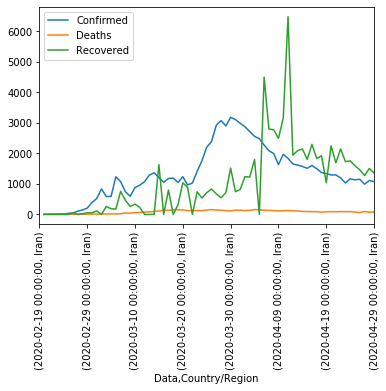

In [14]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Confirmed - действительно выходит на плато <br>
Deaths - плюс минус ровно <br>
Recovered - действительно пики

In [15]:
# первая разность
X1 = COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed']].diff(1).values
X1[0,:] = 0
X1.shape

(71, 1)

In [16]:
# сам ряд
X2 = COVID.loc[COVID.index.get_level_values('Country/Region')=='Iran', ['Confirmed']].values 
X2.shape

(71, 1)

In [17]:
# датные столбцы, день недели и день года
X3 = COVID.iloc[COVID.index.get_level_values('Country/Region')=='Iran'].index.get_level_values( 'Data')
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear
X3.shape, X3_1.shape, X3_2.shape 

((71,), (71,), (71,))

In [18]:
XX = np.concatenate([X2, X1], axis= 1)
XX = np.concatenate([XX,np.array(X3_1).reshape((X1.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(X3_2).reshape((X1.shape[0],1))], axis= 1)
XX.shape

(71, 4)

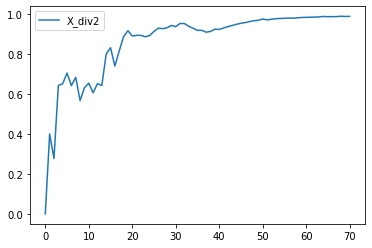

In [19]:
# есть первая разность. есть ли смысл строить не разность а первое частное?

X_div2 = [0]

for i in range(1,len(XX[:,0])):
    X_div2 = np.append(X_div2, XX[:,0][i-1]/XX[:,0][i])

plt.plot(X_div2, label='X_div2')
plt.legend()
plt.show()

XX = np.concatenate([XX,X_div2.reshape((X_div2.shape[0],1))], axis= 1)

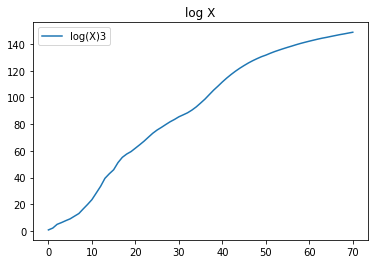

In [20]:
#логарифмы исходных данных
X_log3, lmbda3 = scs.boxcox(XX[:,0])

plt.plot(X_log3[:], label='log(X)3')
plt.legend()
plt.title('log X')
plt.show()

XX = np.concatenate([XX,X_log3.reshape((X_log3.shape[0],1))], axis= 1)

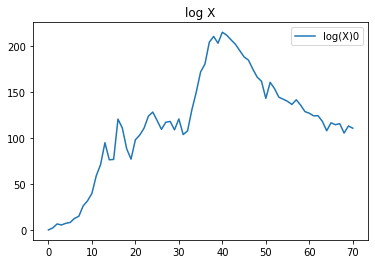

In [21]:
# логарифмы первых разностей
X_log0, lmbda0 = scs.boxcox(XX[:,1]+1)

plt.plot(X_log0[:], label='log(X)0')
plt.legend()
plt.title('log X')
plt.show()

XX = np.concatenate([XX,X_log0.reshape((X_log0.shape[0],1))], axis= 1)

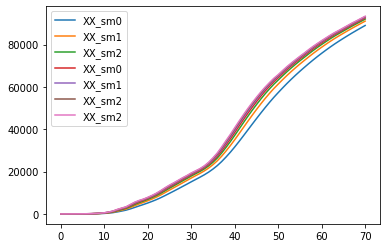

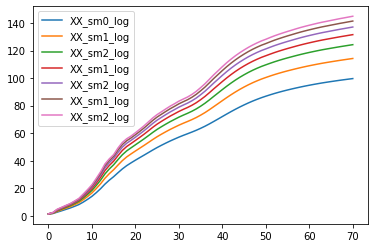

In [22]:
# сглаживание и их логарифмы
# сглаживание относительно самих данных бесполезно. но можно посмотреть сглаживание у первых разностей
# теоретически сглаживание можно строить вообще к половине столбцов

def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

XX_sm0 = exponential_smoothing(XX[:,0], 0.2)
XX_sm1 = exponential_smoothing(XX[:,0], 0.3)
XX_sm2 = exponential_smoothing(XX[:,0], 0.4)
XX_sm3 = exponential_smoothing(XX[:,0], 0.5)
XX_sm4 = exponential_smoothing(XX[:,0], 0.6)
XX_sm5 = exponential_smoothing(XX[:,0], 0.7)
XX_sm6 = exponential_smoothing(XX[:,0], 0.8)

XX_sm0_log, lmbda0 = scs.boxcox(np.array(XX_sm0)+1)
XX_sm1_log, lmbda1 = scs.boxcox(np.array(XX_sm1)+1)
XX_sm2_log, lmbda2 = scs.boxcox(np.array(XX_sm2)+1)
XX_sm3_log, lmbda3 = scs.boxcox(np.array(XX_sm3)+1)
XX_sm4_log, lmbda4 = scs.boxcox(np.array(XX_sm4)+1)
XX_sm5_log, lmbda5 = scs.boxcox(np.array(XX_sm5)+1)
XX_sm6_log, lmbda6 = scs.boxcox(np.array(XX_sm6)+1)


XX = np.concatenate([XX,np.array(XX_sm0).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm1).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm2).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm3).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm4).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm5).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm6).reshape((XX.shape[0],1))], axis= 1)

XX = np.concatenate([XX,np.array(XX_sm0_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm1_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm2_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm3_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm4_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm5_log).reshape((XX.shape[0],1))], axis= 1)
XX = np.concatenate([XX,np.array(XX_sm6_log).reshape((XX.shape[0],1))], axis= 1)

plt.plot(XX_sm0, label='XX_sm0')
plt.plot(XX_sm1, label='XX_sm1')
plt.plot(XX_sm2, label='XX_sm2')
plt.plot(XX_sm3, label='XX_sm0')
plt.plot(XX_sm4, label='XX_sm1')
plt.plot(XX_sm5, label='XX_sm2')
plt.plot(XX_sm6, label='XX_sm2')
plt.legend()
plt.show()

plt.plot(XX_sm0_log, label='XX_sm0_log')
plt.plot(XX_sm1_log, label='XX_sm1_log')
plt.plot(XX_sm2_log, label='XX_sm2_log')
plt.plot(XX_sm3_log, label='XX_sm1_log')
plt.plot(XX_sm4_log, label='XX_sm2_log')
plt.plot(XX_sm5_log, label='XX_sm1_log')
plt.plot(XX_sm6_log, label='XX_sm2_log')
plt.legend()
plt.show()

In [23]:
XX.shape

(71, 21)

In [318]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [319]:
COVID_Data.columns = ['conf',
                      'fst_dif_c', 
                      'dayofweek',
                      'dayofyear',
                      'fst_div', 
                      'conf_log',
                      'fst_dif_log',
                      'XX_sm0',
                      'XX_sm1',
                      'XX_sm2',
                      'XX_sm3',
                      'XX_sm4',
                      'XX_sm5',
                      'XX_sm6', 
                      'XX_sm0_log',
                      'XX_sm1_log',
                      'XX_sm2_log',
                      'XX_sm3_log',
                      'XX_sm4_log',
                      'XX_sm5_log',
                      'XX_sm6_log'
                       ]

In [27]:
# scl=StandardScaler()
# X_scl = COVID_Data.iloc[:,:-1].values
# Xscale = scl.fit_transform(X_scl)
# pca = PCA(n_components=2, svd_solver='full')
# Xpca=pca.fit_transform(Xscale[:,1:])
# Xpca.shape

# COVID_Data['pca1']=Xpca[:,0]
# COVID_Data['pca2']=Xpca[:,1]
# COVID_Data = COVID_Data.drop(['pca1','pca2'],axis=1)

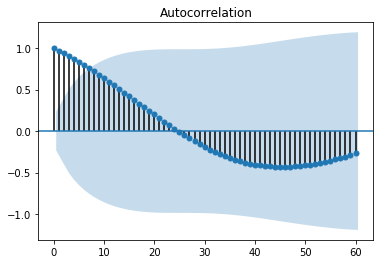

C:\Users\marchenko-i-u\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


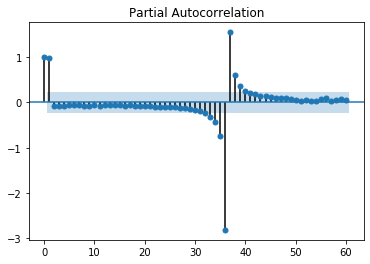

In [28]:
sm.graphics.tsa.plot_acf(COVID_Data.iloc[:,0], lags=60)
plt.show()
sm.graphics.tsa.plot_pacf(COVID_Data.iloc[:,0], lags=60)
plt.show()

эээээ ой... сезонности нету, правильно? сильная корреляция с35 и 36 днем...

In [29]:
p = 5
for i in range(p):
    COVID_Data['t'+str(p-i)]=0
    COVID_Data['t'+str(p-i)].values[p:] = COVID_Data['conf'].values[i:-(p)+i]
    
p = 5
for i in range(p):
    COVID_Data['d'+str(p-i)]=0
    COVID_Data['d'+str(p-i)].values[p:] = COVID_Data['fst_dif_c'].values[i:-(p)+i]

In [30]:
COVID_Data.corr()

,conf,fst_dif_c,dayofweek,dayofyear,fst_div,conf_log,fst_dif_log,XX_sm0,XX_sm1,XX_sm2,...,t5,t4,t3,t2,t1,d5,d4,d3,d2,d1
conf,1.000000,0.456930,-0.031536,0.977154,0.646447,0.935233,0.523671,0.996810,0.998751,0.999451,...,0.993245,0.995657,0.997548,0.998908,0.999726,0.673925,0.636437,0.597058,0.550693,0.505652
fst_dif_c,0.456930,1.000000,0.008965,0.544230,0.602148,0.664460,0.974707,0.388897,0.413456,0.427775,...,0.355089,0.374560,0.394682,0.415187,0.435998,0.817689,0.867328,0.911434,0.943957,0.975257
dayofweek,-0.031536,0.008965,1.000000,-0.036274,-0.023248,-0.029157,0.002210,-0.033599,-0.032890,-0.032508,...,-0.033484,-0.033455,-0.034342,-0.033515,-0.032169,-0.013072,-0.017667,-0.049223,0.012841,0.034360
dayofyear,0.977154,0.544230,-0.036274,1.000000,0.763822,0.981089,0.633265,0.967194,0.971270,0.973357,...,0.959984,0.964012,0.967744,0.971182,0.974324,0.700836,0.673453,0.645363,0.611261,0.579321
fst_div,0.646447,0.602148,-0.023248,0.763822,1.000000,0.823724,0.724583,0.616827,0.628197,0.634497,...,0.602044,0.611299,0.620429,0.629482,0.638213,0.658721,0.653723,0.648538,0.640930,0.625714
conf_log,0.935233,0.664460,-0.029157,0.981089,0.823724,1.000000,0.754104,0.911604,0.920953,0.925961,...,0.898958,0.906905,0.914530,0.921829,0.928751,0.793389,0.774189,0.752703,0.724940,0.697111
fst_dif_log,0.523671,0.974707,0.002210,0.633265,0.724583,0.754104,1.000000,0.460200,0.483265,0.496617,...,0.428953,0.447182,0.465880,0.484883,0.504197,0.826496,0.865826,0.899712,0.925093,0.952464
XX_sm0,0.996810,0.388897,-0.033599,0.967194,0.616827,0.911604,0.460200,1.000000,0.999529,0.998864,...,0.999244,0.999782,0.999796,0.999292,0.998288,0.616869,0.575354,0.532839,0.484027,0.437727
XX_sm1,0.998751,0.413456,-0.032890,0.971270,0.628197,0.920953,0.483265,0.999529,1.000000,0.999854,...,0.997788,0.999047,0.999768,0.999951,0.999606,0.639878,0.599349,0.557452,0.509023,0.462657
XX_sm2,0.999451,0.427775,-0.032508,0.973357,0.634497,0.925961,0.496617,0.998864,0.999854,1.000000,...,0.996525,0.998190,0.999314,0.999896,0.999937,0.652293,0.612581,0.571287,0.523293,0.477073


In [31]:
COVID_Data.shape

(71, 31)

In [328]:
COVID_Data.head(10)

,conf,fst_dif_c,dayofweek,dayofyear,fst_div,conf_log,fst_dif_log,XX_sm0,XX_sm1,XX_sm2,...,XX_sm4,XX_sm5,XX_sm6,XX_sm0_log,XX_sm1_log,XX_sm2_log,XX_sm3_log,XX_sm4_log,XX_sm5_log,XX_sm6_log
Data,,,,,,,,,,,,,,,,,,,,,
2020-02-19,2.0,0.0,2.0,0.0,0.000000,0.783314,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.302381,1.313922,1.321110,1.326001,1.329543,1.332229,1.334336
2020-02-20,5.0,3.0,3.0,1.0,0.400000,2.153642,2.169940,2.600000,2.900000,3.200000,...,3.800000,4.100000,4.400000,1.563385,1.701309,1.829900,1.951352,2.066947,2.177539,2.283747
2020-02-21,18.0,13.0,4.0,2.0,0.277778,4.966245,6.500543,5.680000,7.430000,9.120000,...,12.320000,13.830000,15.280000,2.563154,3.044644,3.455965,3.815087,4.133428,4.418719,4.676458
2020-02-22,28.0,10.0,5.0,3.0,0.642857,6.263819,5.394366,10.144000,13.601000,16.672000,...,21.728000,23.749000,25.456000,3.544073,4.222990,4.756112,5.185018,5.534256,5.819747,6.052524
2020-02-23,43.0,15.0,6.0,4.0,0.651163,7.728426,7.186052,16.715200,22.420700,27.203200,...,34.491200,37.224700,39.491200,4.572988,5.414271,6.044043,6.529922,6.911878,7.216385,7.462403
2020-02-24,61.0,18.0,0.0,5.0,0.704918,9.093928,8.153752,25.572160,33.994490,40.721920,...,50.396480,53.867410,56.698240,5.598718,6.576614,7.284773,7.816050,8.224717,8.545788,8.803105
2020-02-25,95.0,34.0,1.0,6.0,0.642105,11.078852,12.534805,39.457728,52.296143,62.433152,...,77.158592,82.660223,87.339648,6.803303,7.963630,8.799875,9.430279,9.922595,10.319049,10.647133
2020-02-26,139.0,44.0,2.0,7.0,0.683453,13.044753,14.862598,59.366182,78.307300,93.059891,...,114.263437,122.098067,128.667930,8.100814,9.455240,10.426229,11.156277,11.725309,12.181660,12.555868
2020-02-27,245.0,106.0,3.0,8.0,0.567347,16.496705,26.226722,96.492946,128.315110,153.835935,...,192.705375,208.129420,221.733586,9.875834,11.567209,12.807135,13.764700,14.533798,15.170765,15.711328


In [588]:
p = 5
h=1 
scl_target=StandardScaler() 

# y - начиная с 6го элемента
target = COVID_Data.iloc[h+p:,0].to_numpy().reshape((COVID_Data.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(65, 1)

In [587]:
# x - с 5го 
scl_x=StandardScaler() 
X = scl_x.fit_transform(COVID_Data.iloc[p:-h,:].values)
X.shape

(65, 21)

In [563]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(65, 5)

In [564]:
column_names = COVID_Data.columns[sfk.get_support()]
column_names

Index(['conf', 'XX_sm3', 'XX_sm4', 'XX_sm5', 'XX_sm6'], dtype='object')

In [565]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(65, 2)

In [566]:
column_namesp = COVID_Data.columns[sfp.get_support()]
column_namesp

Index(['conf', 'XX_sm6'], dtype='object')

In [567]:
gr_model = GradientBoostingRegressor(max_depth=4, random_state=7, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(65, 5)

In [589]:
column_namesm = COVID_Data.columns[sfm.get_support()]
column_namesm

Index(['XX_sm0', 'XX_sm2', 'XX_sm5', 'XX_sm0_log', 'XX_sm6_log'], dtype='object')

In [568]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 10 11 12 13]
Номера признаков лучших признаков по процентной форме:  [ 0 13]
Номера признаков для выбора по модели :  [ 7  9 12 14 20]


In [569]:
list_par = list(set(np.concatenate((np.concatenate((list_param_k,list_param_p)),list_param_m))))

In [590]:
list_par

[0, 7, 9, 10, 11, 12, 13, 14, 20]

In [591]:
COVID_Data.columns[list_par]

Index(['conf', 'XX_sm0', 'XX_sm2', 'XX_sm3', 'XX_sm4', 'XX_sm5', 'XX_sm6',
       'XX_sm0_log', 'XX_sm6_log'],
      dtype='object')

In [592]:
X_new = X[:,list_par]

In [593]:
N=-10 # это доля тестовой выборки
x_train,y_train,x_test,y_test=X_new[:N,:],y[:N,:],X_new[N:,:],y[N:,:]

In [594]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((55, 9), (55, 1), (10, 9), (10, 1))

In [595]:
model_lb = LinearRegression()
model_gb = GradientBoostingRegressor(n_estimators=100)

In [596]:
model_lb.fit(x_train,y_train.ravel())
model_gb.fit(x_train,y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [597]:
y_pred_train_lb = model_lb.predict(x_train)
y_pred_test_lb = model_lb.predict(x_test)

y_pred_train_gb = model_gb.predict(x_train)
y_pred_test_gb = model_gb.predict(x_test)

In [598]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [599]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_pred_test_gb))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')
er_l = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_pred_test_lb))
print('ошибка линейной регрессии MAPE :  ', er_l,'%')

ошибка градиентного бустинга MAPE :   7.235670826470594 %
ошибка линейной регрессии MAPE :   4.178294195348058 %


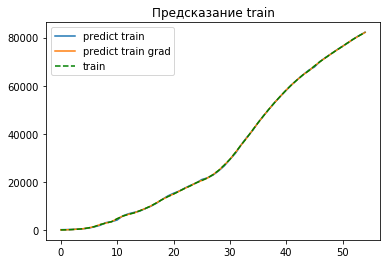

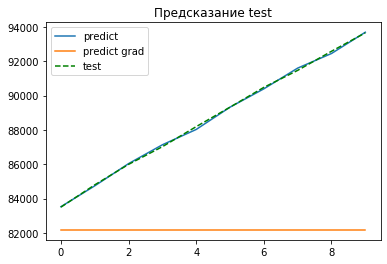

In [607]:
plt.plot(scl_target.inverse_transform(y_pred_train_lb), label='predict train')
plt.plot(scl_target.inverse_transform(y_pred_train_gb), label='predict train grad')
plt.plot(scl_target.inverse_transform(y_train),'--g', label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()
plt.plot(scl_target.inverse_transform(y_pred_test_lb), label='predict')
plt.plot(scl_target.inverse_transform(y_pred_test_gb), label='predict grad')
plt.plot(scl_target.inverse_transform(y_test), '--g',label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

#### Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

In [608]:
COVID_Data.columns[list_par]

Index(['conf', 'XX_sm0', 'XX_sm2', 'XX_sm3', 'XX_sm4', 'XX_sm5', 'XX_sm6',
       'XX_sm0_log', 'XX_sm6_log'],
      dtype='object')

In [612]:
# 'conf', 'XX_sm0', 'XX_sm2', 'XX_sm3', 'XX_sm4', 'XX_sm5', 'XX_sm6',
#        'XX_sm0_log', 'XX_sm6_log'
p = 5
X_test_100 = x_test.copy()
X_test_100 = np.vstack([x_train[-p:,:],X_test_100])
y_test_100 = y_pred_test_lb.copy()
y_test_100 = np.hstack([y_train[-p:,0],y_test_100])
N10 = 10

for ip in range(N10):
    i=ip+p
    y_test_100[i] = model_lb.predict(X_test_100[i,:].reshape((1,9)))
    y_i=scl_target.inverse_transform(y_test_100[i:i+1])
    
    if ip != N10-1: 
        X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0] #conf масштабированный
        X_test_100[i+1,1] = X_test_100[i+1,0]*(1-0.02)+ 0.02 * X_test_100[i,1] #XX_sm0
        X_test_100[i+1,2] = X_test_100[i+1,0]*(1-0.04)+ 0.04 * X_test_100[i,2] #XX_sm2
        X_test_100[i+1,3] = X_test_100[i+1,0]*(1-0.05)+ 0.05 * X_test_100[i,3] #XX_sm3
        X_test_100[i+1,4] = X_test_100[i+1,0]*(1-0.06)+ 0.06 * X_test_100[i,4] #XX_sm4
        X_test_100[i+1,5] = X_test_100[i+1,0]*(1-0.07)+ 0.07 * X_test_100[i,5] #XX_sm5
        X_test_100[i+1,6] = X_test_100[i+1,0]*(1-0.08)+ 0.08 * X_test_100[i,6] #XX_sm6
        
        X_test_100[i+1,7] = np.log(X_test_100[i+1,1]) #XX_sm0_log
        X_test_100[i+1,8] = np.log(X_test_100[i+1,6]) #XX_sm6_log

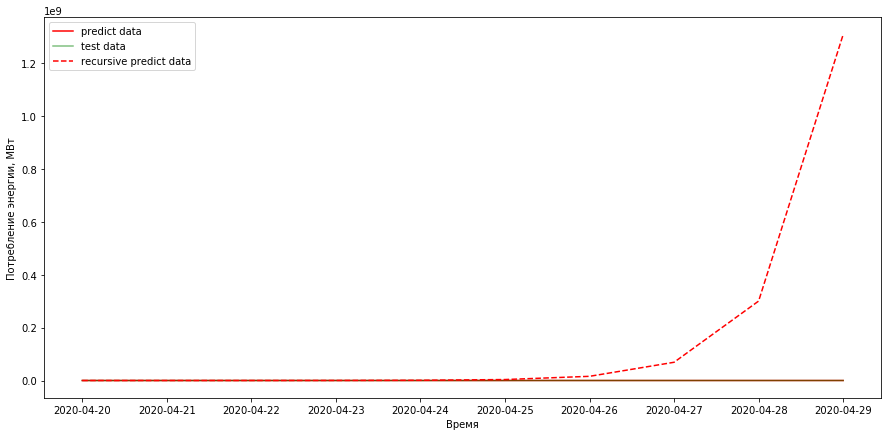

In [613]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(COVID_Data.index[-N10:],scl_target.inverse_transform(y_pred_test_lb[:N10]), 'r',label='predict data' )
plt.plot(COVID_Data.index[-N10:],scl_target.inverse_transform(y_test[:N10]), 'g',label='test data', alpha=0.5)
plt.plot(COVID_Data.index[-N10:],scl_target.inverse_transform(y_test_100[p:]), '--r',label='recursive predict data')

plt.legend()
plt.show()   

In [615]:
er_100 = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_test_100[p:]))
print('ошибка линейной регрессии MAPE :  ', er_100,'%')

ошибка линейной регрессии MAPE :   191411.68338067914 %


у меня ошибка получается чудовищная. и растет в геометрической прогрессии. с самого начала предсказанная точка получается чуть больше, и потом становится все больше и больше. или я где-то ошиблась, или я не знаю. 

In [616]:
for j in range(10):
    error_p=mean_absolute_percentage_error(y_true=y_test[j],y_pred = y_test_100[p+j:p+j+1])

    print('ошибка рекурсивной модели в точке',j,'  MAPE :  ', error_p,'%')

ошибка рекурсивной модели в точке 0   MAPE :   0.05933548017031788 %
ошибка рекурсивной модели в точке 1   MAPE :   13.866816925634886 %
ошибка рекурсивной модели в точке 2   MAPE :   85.55208310407455 %
ошибка рекурсивной модели в точке 3   MAPE :   403.11174121334085 %
ошибка рекурсивной модели в точке 4   MAPE :   1760.6528912536633 %
ошибка рекурсивной модели в точке 5   MAPE :   7546.6818066985215 %
ошибка рекурсивной модели в точке 6   MAPE :   32167.09985456837 %
ошибка рекурсивной модели в точке 7   MAPE :   137410.3882726586 %
ошибка рекурсивной модели в точке 8   MAPE :   585573.7298301925 %
ошибка рекурсивной модели в точке 9   MAPE :   2498176.9645821014 %


#### Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

In [617]:
p = 5
h=4
scl_target=StandardScaler() 

# y - начиная с 6го элемента
target = COVID_Data.iloc[h+p:,0].to_numpy().reshape((COVID_Data.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(62, 1)

In [619]:
# x - с 5го 
scl_x=StandardScaler() 
X = scl_x.fit_transform(COVID_Data.iloc[p:-h,:].values)
X.shape

(62, 21)

In [620]:
X_new = X[:,list_par]

In [621]:
N=-10
x_train,y_train,x_test,y_test=X_new[:N,:],y[:N,:],X_new[N:,:],y[N:,:]

In [622]:
model_lb = LinearRegression()
model_gb = GradientBoostingRegressor(n_estimators=100)

In [623]:
model_lb.fit(x_train,y_train.ravel())
model_gb.fit(x_train,y_train.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [624]:
y_pred_train_lb = model_lb.predict(x_train)
y_pred_test_lb = model_lb.predict(x_test)

y_pred_train_gb = model_gb.predict(x_train)
y_pred_test_gb = model_gb.predict(x_test)

In [627]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_pred_test_gb))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')
er_l = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_pred_test_lb))
print('ошибка линейной регрессии MAPE :  ', er_l,'%')

ошибка градиентного бустинга MAPE :   7.218213015706551 %
ошибка линейной регрессии MAPE :   4.15026499104923 %


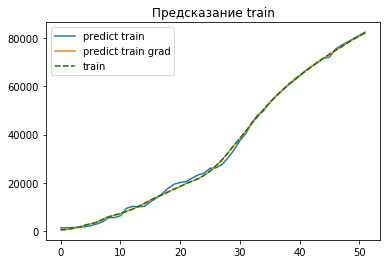

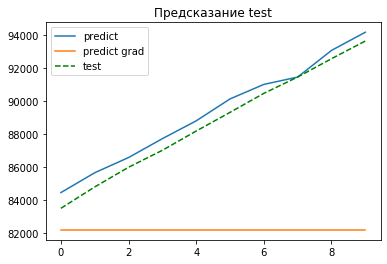

In [629]:
plt.plot(scl_target.inverse_transform(y_pred_train_lb), label='predict train')
plt.plot(scl_target.inverse_transform(y_pred_train_gb), label='predict train grad')
plt.plot(scl_target.inverse_transform(y_train),'--g', label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()
plt.plot(scl_target.inverse_transform(y_pred_test_lb), label='predict')
plt.plot(scl_target.inverse_transform(y_pred_test_gb), label='predict grad')
plt.plot(scl_target.inverse_transform(y_test), '--g',label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()